In [ ]:
!pip install tensorflow tensorflow_datasets gdown


In [ ]:
import tensorflow as tf

import tensorflow_datasets as tfds
from random import randint

import matplotlib.pyplot as plt

In [ ]:
DATA_DIR = "/Users/ogulcanece/Desktop/tensorflow_datasets"

In [ ]:
import os

for root, dirs, files in os.walk("/content/drive/MyDrive"):
    for name in files:
        if "celeba" in name.lower():
            print(os.path.join(root, name))


/content/drive/MyDrive/img_align_celeba.zip


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import os


from google.colab import drive
drive.mount('/content/drive')

DATA_DIR = "/content/tensorflow_datasets"
MANUAL_DIR = os.path.join(DATA_DIR, "downloads", "manual")
os.makedirs(MANUAL_DIR, exist_ok=True)

zip_path = "/content/drive/MyDrive/img_align_celeba.zip"
target_path = os.path.join(MANUAL_DIR, "img_align_celeba.zip")
if not os.path.exists(target_path):
    import shutil
    shutil.copy(zip_path, target_path)


train_ds, val_ds, test_ds = tfds.load(
    'celeb_a',
    split=['train[:1%]', 'validation[:1%]', 'test[:1%]'],
    data_dir=DATA_DIR,
    as_supervised=False
)

@tf.function
def preprocess_image(image):
    image = tf.image.resize(image, [64, 64])
    image = tf.cast(image, tf.float32) / 255.0
    return tf.reshape(image, [-1])


def preprocess_dataset(dataset, attribute):
    X, y = [], []
    for sample in dataset:
        image = preprocess_image(sample['image'])
        label = int(sample['attributes'][attribute].numpy())
        X.append(image.numpy())
        y.append(label)
    return np.array(X), np.array(y)

X_train, y_train = preprocess_dataset(train_ds, 'Male')

clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Doğruluk ortalaması:", scores.mean())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

ValueError: Failed to obtain confirmation link for GDrive URL https://drive.google.com/uc?export=download&id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS.

In [ ]:
import tensorflow_datasets as tfds

DATA_DIR = "/Users/ogulcanece/Desktop/tensorflow_datasets"


builder = tfds.builder('celeb_a', data_dir=DATA_DIR)

builder.download_and_prepare(download_config=tfds.download.DownloadConfig(
    manual_dir=DATA_DIR + "/downloads/manual"
))


ds = tfds.load('celeb_a', data_dir=DATA_DIR, split='train', shuffle_files=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to /Users/ogulcanece/Desktop/tensorflow_datasets/downloads/celeb_a/ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.b18af58c04b74dfa8dda76e34f5e1196/download, has wrong checksum:
* Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip')
* Got: UrlInfo(size=1.96 KiB, checksum='0e04dd99c4a135a185e7cfee6dd55f77c52bdf8d75a170e26289175d390c9046', filename='download')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

In [ ]:
train_ds, val_ds, test_ds = tfds.load(
    'celeb_a',
    split=['train', 'validation', 'test'],
    data_dir=DATA_DIR,
    as_supervised=False
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to /Users/ogulcanece/Desktop/tensorflow_datasets/downloads/celeb_a/ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.c95f4a9e7c394249bda475346c374376/download, has wrong checksum:
* Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip')
* Got: UrlInfo(size=1.96 KiB, checksum='5fc13052183cff250bcfa42559d6f6a830436a0edc5e41fc7929508f33dd82fe', filename='download')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

In [ ]:
N = 10
examples = list(train_ds.take(N))

{'5_o_Clock_Shadow': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Arched_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Attractive': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
 'Bags_Under_Eyes': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bald': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bangs': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Big_Lips': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
 'Big_Nose': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Black_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Blond_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Blurry': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Brown_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Bushy_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Chubby': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Double_Chin': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'Eyeglasses': <tf.Tensor: shape=(), dtype=bool, numpy=Fals

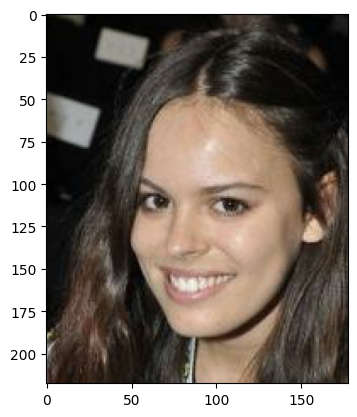

In [ ]:
example = examples[randint(0,N)]
plt.imshow(example['image'])
example['attributes']

In [ ]:
import tensorflow_datasets as tfds
import numpy as np


DATA_DIR = '/Users/ogulcanece/tensorflow_datasets'
ds = tfds.load('celeb_a', split='train', data_dir=DATA_DIR, as_supervised=False)


N = 10000
images = []
labels = []

for i, ex in enumerate(tfds.as_numpy(ds)):
    if i >= N:
        break
    img = ex['image']
    label = ex['attributes']['Male']  # 1: erkek, 0: kadın

    # Görüntüyü grayscale yap ve flatten et
    img_resized = tf.image.resize(img, (32, 32)).numpy()
    img_gray = np.mean(img_resized, axis=2).flatten()  # shape (32*32,)

    images.append(img_gray)
    labels.append(label)

X = np.array(images)
y = np.array(labels)

print("Data shape:", X.shape, y.shape)


Data shape: (10000, 1024) (10000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


logreg = LogisticRegression(max_iter=1000)
log_scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
print(f"Logistic Regression Accuracy: {log_scores.mean():.4f} ± {log_scores.std():.4f}")


svm = SVC(kernel='rbf')
svm_scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')
print(f"SVM Accuracy: {svm_scores.mean():.4f} ± {svm_scores.std():.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy: 0.8310 ± 0.0114
SVM Accuracy: 0.8535 ± 0.0079



Classification Report (SVM):
              precision    recall  f1-score   support

      Female       0.93      0.95      0.94      5810
        Male       0.93      0.90      0.91      4190

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



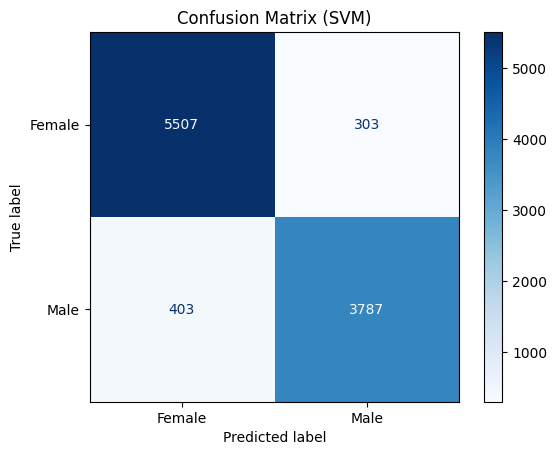

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


svm.fit(X, y)
y_pred = svm.predict(X)

print("\nClassification Report (SVM):")
print(classification_report(y, y_pred, target_names=['Female', 'Male']))


ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=['Female', 'Male'], cmap='Blues')
plt.title("Confusion Matrix (SVM)")
plt.show()


In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf

DATA_DIR = '/Users/ogulcanece/tensorflow_datasets'
ds = tfds.load('celeb_a', split='train', data_dir=DATA_DIR, as_supervised=False)


N = 10000
images = []
labels = []

for i, ex in enumerate(tfds.as_numpy(ds)):
    if i >= N:
        break
    img = ex['image']
    label = ex['attributes']['Eyeglasses']

    img_resized = tf.image.resize(img, (32, 32)).numpy()
    img_gray = np.mean(img_resized, axis=2).flatten()

    images.append(img_gray)
    labels.append(label)

X = np.array(images)
y = np.array(labels)

print("Shape:", X.shape, y.shape)


Shape: (10000, 1024) (10000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
print(f"Random Forest Accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")


gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_scores = cross_val_score(gb, X, y, cv=cv, scoring='accuracy')
print(f"Gradient Boosting Accuracy: {gb_scores.mean():.4f} ± {gb_scores.std():.4f}")


Random Forest Accuracy: 0.9540 ± 0.0022


In [ ]:
gb.fit(X, y)
y_pred = gb.predict(X)

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y, y_pred, target_names=['No Glasses', 'Wearing Glasses']))

ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=['No Glasses', 'Wearing Glasses'], cmap='Purples')
plt.title("Confusion Matrix (Gradient Boosting)")
plt.show()


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf


dataset, info = tfds.load('celeb_a', split=['train'], with_info=True, shuffle_files=True)


train_ds = dataset[0]


def preprocess(example):
    image = tf.image.resize(example['image'], (64,64))
    label = example['attributes']['Smiling']
    label = tf.cast(label, tf.float32)
    return image, label

train_ds = train_ds.map(preprocess)
train_ds = train_ds.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to /root/tensorflow_datasets/downloads/celeb_a/ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.6eece6d7ff5d42739f301108d8eb30bf/download, has wrong checksum:
* Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip')
* Got: UrlInfo(size=1.96 KiB, checksum='664a45d40a5ce5f5162868781677c2ced7eab1be31f3ef83f1be865306443d79', filename='download')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

In [ ]:
input_shape = (64, 64, 3)

def build_model_1(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_model_2(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
train_ds = tfds.load('celeb_a', split='train[:80%]', as_supervised=True)
val_ds = tfds.load('celeb_a', split='train[80%:]', as_supervised=True)


from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


y_true = []
y_pred = []

for images, labels in val_ds.batch(32):
    preds = model1.predict(images)
    preds = (preds > 0.5).astype(int)
    y_pred.extend(preds.flatten())
    y_true.extend(labels.numpy().flatten())

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

DATA_DIR = "/Users/ogulcanece/tensorflow_datasets"


(train_ds, val_ds, test_ds), ds_info = tfds.load(
    'celeb_a',
    split=['train', 'validation', 'test'],
    data_dir=DATA_DIR,
    as_supervised=False,
    with_info=True
)


def preprocess(example):
    image = tf.image.resize(example['image'], (64, 64)) / 255.0
    label = tf.cast(example['attributes']['Male'], tf.float32)
    return image, label


BATCH_SIZE = 64

train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(train_ds, validation_data=val_ds, epochs=5)


test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.4f}")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2544/2544 ━━━━━━━━━━━━━━━━━━━━ 857s 336ms/step - accuracy: 0.9104 - loss: 0.2048 - val_accuracy: 0.9706 - val_loss: 0.0769
Epoch 2/5
2544/2544 ━━━━━━━━━━━━━━━━━━━━ 847s 333ms/step - accuracy: 0.9650 - loss: 0.0913 - val_accuracy: 0.9728 - val_loss: 0.0707
Epoch 3/5
2544/2544 ━━━━━━━━━━━━━━━━━━━━ 849s 333ms/step - accuracy: 0.9721 - loss: 0.0734 - val_accuracy: 0.9736 - val_loss: 0.0683
Epoch 4/5
2544/2544 ━━━━━━━━━━━━━━━━━━━━ 828s 325ms/step - accuracy: 0.9767 - loss: 0.0605 - val_accuracy: 0.9756 - val_loss: 0.0668
Epoch 5/5
2544/2544 ━━━━━━━━━━━━━━━━━━━━ 823s 323ms/step - accuracy: 0.9815 - loss: 0.0497 - val_accuracy: 0.9763 - val_loss: 0.0686
312/312 ━━━━━━━━━━━━━━━━━━━━ 33s 103ms/step - accuracy: 0.9686 - loss: 0.0926

Test Accuracy: 0.9681
